# AI Based Fraud Detection System

In [160]:
!pip install --upgrade scikit-learn
!pip install --upgrade xgboost

# EDA

In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

data = pd.read_csv('creditcard.csv')

In [162]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [163]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [164]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

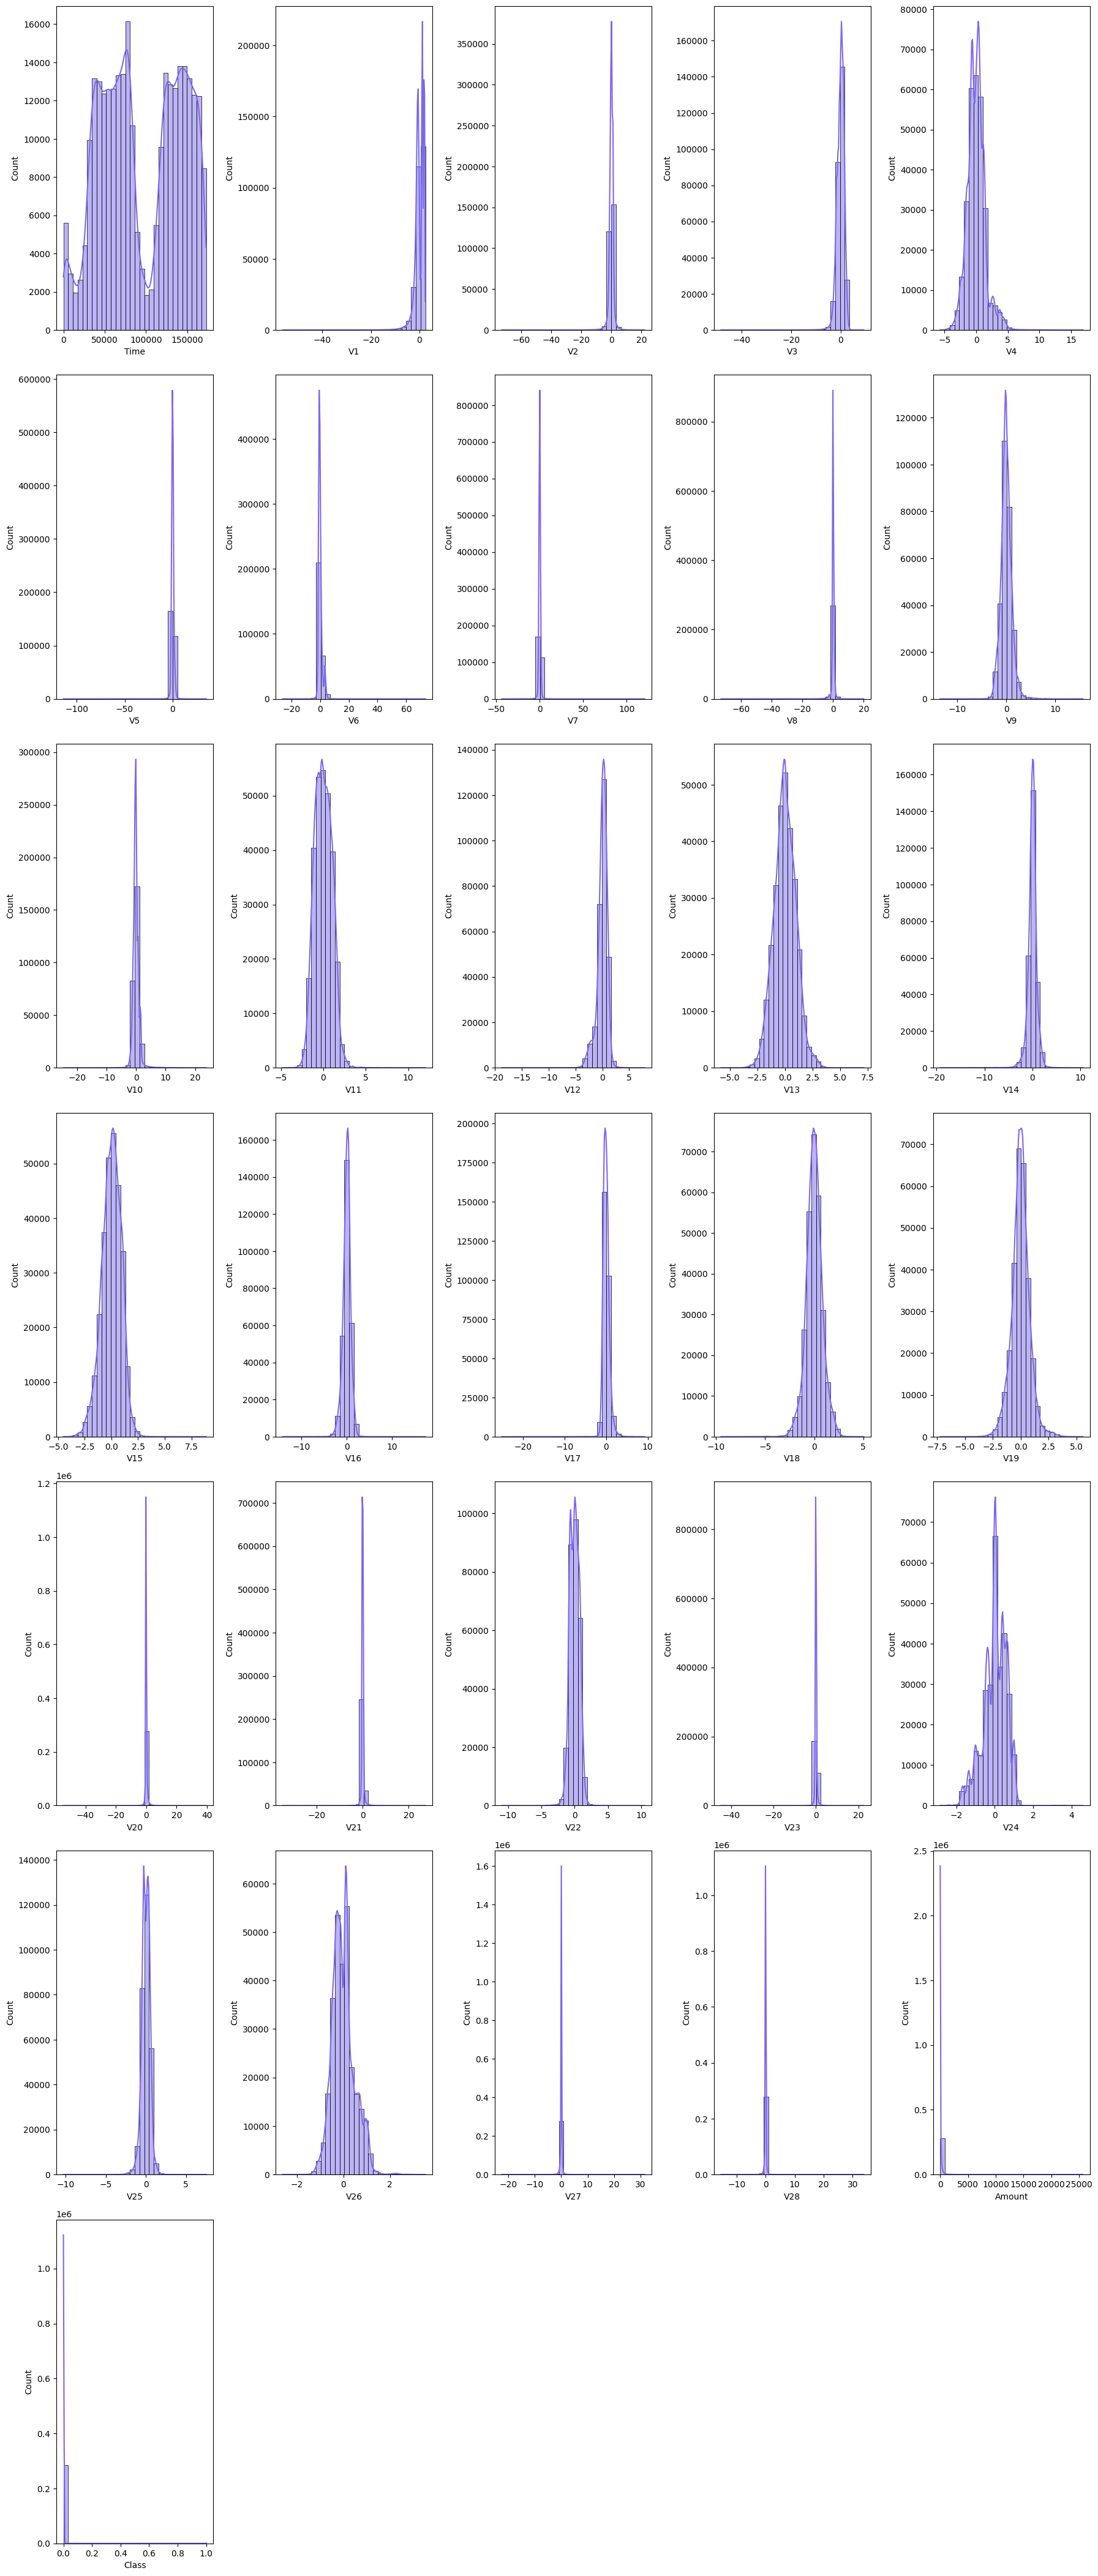

In [165]:
dist_cols = data.select_dtypes(include=np.number).columns.tolist()
num_cols = len(dist_cols)
num_rows = (num_cols + 1) // 2
num_cols_grid = 5

plt.figure(figsize=(18, 6 * num_rows))

for i, col in enumerate(dist_cols, 1):
  plt.subplot(num_rows, num_cols_grid, i)
  sns.histplot(data[col], kde=True, bins=30, color='mediumslateblue')

plt.tight_layout()
plt.show()

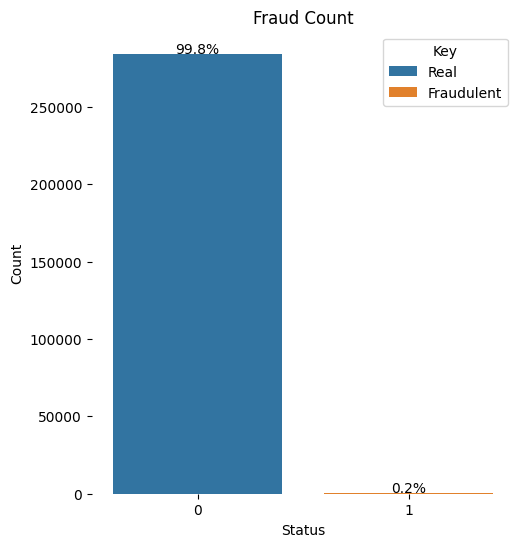

In [166]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

fraud_counts = data['Class'].value_counts()
total_count = fraud_counts.sum()
percentages = (fraud_counts / total_count) * 100

barplot = sns.barplot(x=fraud_counts.index, y=fraud_counts, ax=axes[0],
            palette='tab10', hue=fraud_counts.index)
handles, labels = barplot.get_legend_handles_labels()

for i, (count, percent) in enumerate(zip(fraud_counts, percentages)):
  axes[0].text(i, count+500, f'{percent:.1f}%', ha='center', fontsize=10,
               color='black')

axes[0].legend(title='Key', loc='upper right', handles=handles,
           labels=['Real', 'Fraudulent'])
axes[0].set_title('Fraud Count')
axes[0].set_xlabel('Status')
axes[0].set_ylabel('Count')
sns.despine(left=True, bottom=True)
axes[1].set_visible(False)
plt.show()

# Data Split

In [187]:
from sklearn.model_selection import train_test_split

original_data = data.copy()

train_set, test_set = train_test_split(original_data, test_size=0.3,
                                        random_state=42)


In [188]:
data = train_set.copy()

# Preprocessing

In [189]:
data['Class'].value_counts()

,count
Class,
0,199008
1,356


In [190]:
data = train_set.drop(columns=['Class'])
data_labels = train_set['Class']

test_labels = test_set['Class']
test_set = test_set.drop(columns=['Class'])
data.drop(columns=['Time'], inplace=True)

In [191]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer, RobustScaler
from sklearn.compose import ColumnTransformer
def log_transform(x):
  return np.log10(x + 1e-12)

log_transformer = make_pipeline(
    FunctionTransformer(log_transform),
    StandardScaler()
)

preprocessing = ColumnTransformer([
    ('log', log_transformer, ['Amount']),
    ('robust', RobustScaler(), ['V1'])],
    remainder=StandardScaler())


# Random Forest Model

In [192]:
import xgboost as xgb
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve, auc, confusion_matrix

In [193]:
forest_pipeline = Pipeline([
    ('preprocessing', preprocessing),
    ('classifier', xgb.XGBClassifier(random_state=42, device='cpu')) #change to cuda
])
forest_pipeline.fit(data, data_labels)

x_pred = cross_val_predict(forest_pipeline, data, data_labels, cv=3)

precision, recall, thresholds = precision_recall_curve(data_labels, x_pred)
auprc = auc(recall, precision)
print(f'AUPRC: {auprc}')

AUPRC: 0.8622176477732764


In [194]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

tuning_params = {
    'classifier__n_estimators':randint(80, 1000),
    'classifier__max_depth':randint(5, 20),
    'classifier__learning_rate':[0.001, 0.003, 0.01, 0.03, 0.1, 0.2, 0.3]
}

random_search = RandomizedSearchCV(forest_pipeline,
                                   param_distributions=tuning_params,
                                   n_iter=10, cv=3, random_state=42)

random_search.fit(data, data_labels)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=StandardScaler(),
                                                                transformers=[('log',
                                                                               Pipeline(steps=[('functiontransformer',
                                                                                                FunctionTransformer(func=<function log_transform at 0x79fa47716ac0>)),
                                                                                               ('standardscaler',
                                                                                                StandardScaler())]),
                                                                               ['Amount']),
                                                                              ('robust',
                                                                               RobustScaler(),
                                                                               ['V1'])])),
                                             ('classifier',
                                              XGBClassifi...
                                                            num_parallel_tree=None,
                                                            random_state=42, ...))]),
                   param_distributions={'classifier__learning_rate': [0.001,
                                                                      0.003,
                                                                      0.01,
                                                                      0.03, 0.1,
                                                                      0.2,
                                                                      0.3],
                                        'classifier__max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x79fa3940a7d0>,
                                        'classifier__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x79fa332eef90>},
                   random_state=42)

In [195]:
forest_model = random_search.best_estimator_
x_test, y_test = test_set, test_labels
y_pred = forest_model.predict(x_test)

precision, recall, thresholds = precision_recall_curve(data_labels, x_pred)
auprc = auc(recall, precision)
print(f'AUPRC: {auprc}')

AUPRC: 0.8622176477732764


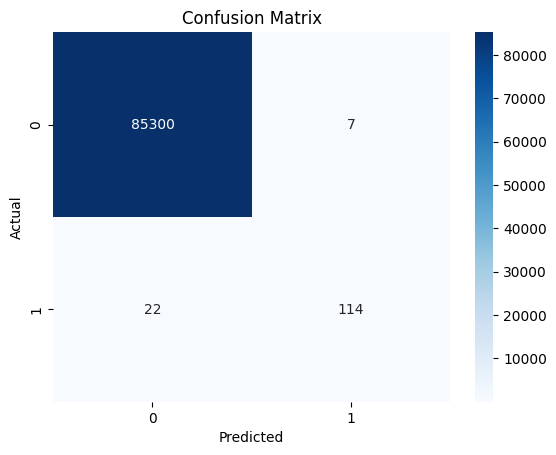

In [196]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [197]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
auprc = auc(recall, precision)
print(f'AUPRC: {auprc}')

AUPRC: 0.8903207680220716


# Autoencoder Model

In [198]:
data = pd.read_csv('creditcard.csv')
data.drop(columns=['Time'], inplace=True)
data['Amount'] = data['Amount'].apply(lambda x: np.log10(x + 1e-12))
data = data.rename(columns={'Amount':'Log_Amount'})

In [201]:
import tensorflow as tf

real_data = data[data['Class']==0]
fraud_data = data[data['Class']==1]

real_data = real_data.sample(frac=1, random_state=42).reset_index(drop=True)

x_train = real_data.iloc[:200000].drop('Class', axis=1)
x_test = pd.concat([real_data.iloc[200000:],
                    fraud_data]).sample(frac=1, random_state=42)

print(x_test['Class'].value_counts())

x_train, x_valid = train_test_split(x_train, test_size=0.2, random_state=42)
x_test, y_test = x_test.drop('Class', axis=1), x_test['Class'].values

print(x_train.shape, x_valid.shape, x_test.shape)

Class
0    84315
1      492
Name: count, dtype: int64
(160000, 29) (40000, 29) (84807, 29)


In [203]:
import tensorflow as tf

encoder = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, kernel_initializer='he_normal',
                          input_shape=(x_train.shape[1],)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(16, kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(8, kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(4, kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(2, kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),])

decoder = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(8, kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(16, kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(32, kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(x_train.shape[1], activation='sigmoid')])

autoencoder = tf.keras.models.Sequential([encoder, decoder])
autoencoder.compile(loss='mse', optimizer='nadam', metrics=['acc'])
autoencoder.summary()

Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_27 (Sequential)           │ (None, 2)                   │           1,918 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_28 (Sequential)           │ (None, 29)                  │           1,937 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,855 (15.06 KB)

 Trainable params: 3,611 (14.11 KB)

 Non-trainable params: 244 (976.00 B)

In [204]:
from sklearn.preprocessing import Normalizer, MinMaxScaler

transform = Pipeline([
    ('normalizer', Normalizer()),
    ('scaler', MinMaxScaler())
])
transform.fit(x_train)
normal_train_data = transform.transform(x_train)
normal_valid_data = transform.transform(x_valid)

In [206]:
from pathlib import Path

early_stopping = tf.keras.callbacks.EarlyStopping(patience=20,
                                                  restore_best_weights=True)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('credit_fraud_model.keras',
                                                      save_best_only=True)

runtime_index = 1
runtime_logdir = Path() / 'creditcard_logs' / f"run_{runtime_index:03d}"
tensorboard_cb = tf.keras.callbacks.TensorBoard(runtime_logdir)
callbacks = [early_stopping, model_checkpoint, tensorboard_cb]

In [207]:
history = autoencoder.fit(normal_train_data, normal_train_data, epochs=25, batch_size=256,
                          validation_data=(normal_valid_data, normal_valid_data),
                          callbacks=callbacks,
                          shuffle=True)

Epoch 1/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - acc: 0.2163 - loss: 0.0224 - val_acc: 0.3264 - val_loss: 0.0146
Epoch 2/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - acc: 0.3348 - loss: 0.0142 - val_acc: 0.3465 - val_loss: 0.0136
Epoch 3/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - acc: 0.3542 - loss: 0.0133 - val_acc: 0.3705 - val_loss: 0.0127
Epoch 4/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - acc: 0.3780 - loss: 0.0125 - val_acc: 0.3882 - val_loss: 0.0121
Epoch 5/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - acc: 0.3909 - loss: 0.0121 - val_acc: 0.3874 - val_loss: 0.0117
Epoch 6/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - acc: 0.3915 - loss: 0.0116 - val_acc: 0.3978 - val_loss: 0.0113
Epoch 7/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - acc: 0.4019 - loss: 0.0114 - val_acc: 0.4016 - val_loss: 0.0111
Epoch 8/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - acc: 0.4016 - loss: 0.0112 - val_acc: 0.4071 - val_loss: 0.0110
Epoch 9/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step

In [211]:
normal_x_test = transform.transform(x_test)
x_test_pred = autoencoder.predict(normal_x_test)
mse = np.mean(np.power(normal_x_test - x_test_pred, 2), axis=1)

comparison = pd.DataFrame({
    'reconstruction_error': mse,
    'true_class': y_test
})
comparison.describe()

2651/2651 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


,reconstruction_error,true_class
count,84807.000000,84807.000000
mean,0.009205,0.005801
std,0.004319,0.075946
min,0.000720,0.000000
25%,0.005952,0.000000
50%,0.008567,0.000000
75%,0.011960,0.000000
max,0.039575,1.000000


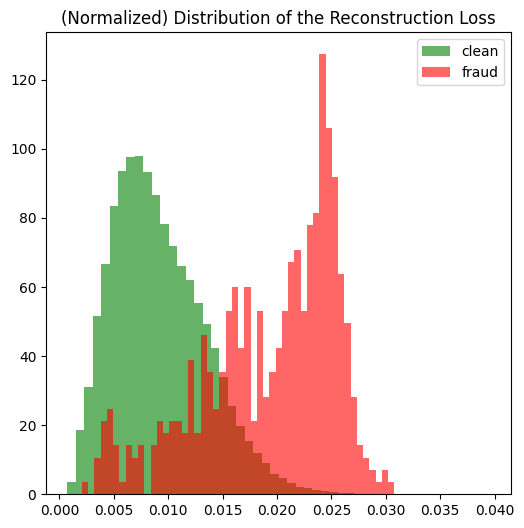

In [212]:
clean = mse[y_test==0]
fraud = mse[y_test==1]

fig, ax = plt.subplots(figsize=(6,6))

ax.hist(clean, bins=50, density=True, label="clean", alpha=.6, color="green")
ax.hist(fraud, bins=50, density=True, label="fraud", alpha=.6, color="red")

plt.title("(Normalized) Distribution of the Reconstruction Loss")
plt.legend()
plt.show()

In [221]:
THRESHOLD = 3

def mad_score(points):
    m = np.median(points)
    ad = np.abs(points - m)
    mad = np.median(ad)

    return 0.6745 * ad / mad

z_scores = mad_score(mse)
y_pred = z_scores > THRESHOLD

In [222]:
print(f"Detected {np.sum(y_pred):,} fraud transactions out of {np.size(z_scores):,} [{np.sum(y_pred)/np.size(z_scores):.2%}].")

Detected 794 fraud transactions out of 84,807 [0.94%].


In [223]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
auprc = auc(recall, precision)
print(f'AUPRC: {auprc}')

AUPRC: 0.3719203565262664


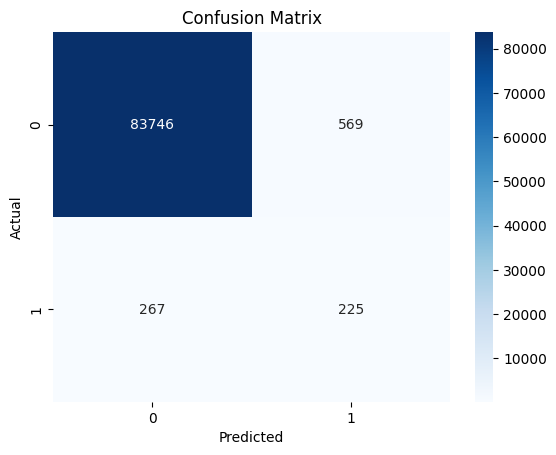

In [224]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()